In [1]:
import os, requests
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers 
from tensorflow.keras import Model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
IMAGE_SIZE = (224, 224)
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 64

In [3]:
gdrive_dir = "/content/drive/MyDrive"
working_dir = os.path.join(gdrive_dir, "CS3244 Project")
data_dir = os.path.join(working_dir, "landmarks/local")
model_root_dir = os.path.join(working_dir, "models/Guojun")

In [ ]:
print('number of local labels:', len(os.listdir(data_dir)))

number of local labels: 11


In [8]:
dataflow_kwargs = dict(target_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
                   interpolation="bilinear")

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255, 
    validation_split = VALIDATION_SPLIT,
    rotation_range = 30,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    brightness_range = [0.9,1.1],
    fill_mode = 'nearest'
)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    subset = "training", 
    shuffle = True, 
    target_size = IMAGE_SIZE ,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split = VALIDATION_SPLIT
)
validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    subset = "validation", 
    shuffle = False, 
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 3650 images belonging to 11 classes.
Found 909 images belonging to 11 classes.


In [ ]:
mobile_model = MobileNetV2()

14540800/14536120 [==============================] - 0s 0us/step


In [ ]:
mobile_model.summary()

In [ ]:
last_layer = mobile_model.get_layer("predictions")
last_output = last_layer.output

In [ ]:
x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(11, activation='softmax')(x)

model = Model(mobile_model.input, x)

In [ ]:
model.summary()

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.RMSprop(lr=0.001),
    metrics = ['accuracy']
)

steps_per_epoch = int(train_generator.samples / BATCH_SIZE)
validation_steps = int(validation_generator.samples / BATCH_SIZE)

print("Steps per epoch:", steps_per_epoch)
print("Validation steps:", validation_steps)

Steps per epoch: 57
Validation steps: 14


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = validation_steps
)

Epoch 1/20
57/57 [==============================] - ETA: 0s - loss: 2.2366 - accuracy: 0.2976

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


57/57 [==============================] - 142s 2s/step - loss: 2.2342 - accuracy: 0.2984 - val_loss: 2.4999 - val_accuracy: 0.1395
Epoch 2/20
57/57 [==============================] - 89s 2s/step - loss: 1.8269 - accuracy: 0.3945 - val_loss: 2.9974 - val_accuracy: 0.1574
Epoch 3/20
57/57 [==============================] - 89s 2s/step - loss: 1.6907 - accuracy: 0.4057 - val_loss: 2.6832 - val_accuracy: 0.1920
Epoch 4/20
57/57 [==============================] - 89s 2s/step - loss: 1.5832 - accuracy: 0.4736 - val_loss: 2.3683 - val_accuracy: 0.2946
Epoch 5/20
57/57 [==============================] - 89s 2s/step - loss: 1.4767 - accuracy: 0.5227 - val_loss: 4.5540 - val_accuracy: 0.1473
Epoch 6/20
57/57 [==============================] - 89s 2s/step - loss: 1.3663 - accuracy: 0.5582 - val_loss: 3.4587 - val_accuracy: 0.2210
Epoch 7/20
57/57 [==============================] - 89s 2s/step - loss: 1.1950 - accuracy: 0.6214 - val_loss: 5.1852 - val_accuracy: 0.1406
Epoch 8/20
57/57 [============

In [ ]:
save_model_dir = os.path.join(model_root_dir, "mobile_local_v1_2ndtrain")
model.save(save_model_dir)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CS3244 Project/models/Guojun/mobile_local_v1_2ndtrain/assets


<Figure size 432x288 with 0 Axes>

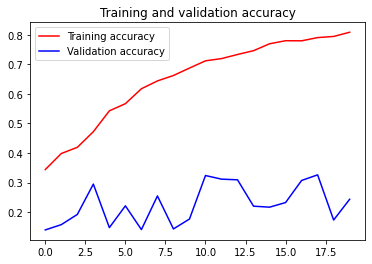

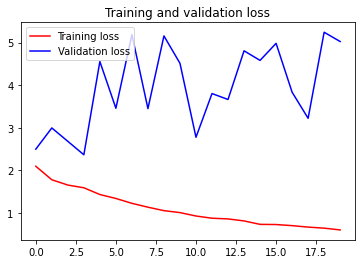

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

In [4]:
load_model_dir = os.path.join(model_root_dir, "mobile_local_v1_2ndtrain")
model = tf.keras.models.load_model(load_model_dir)

In [13]:
# url = "https://www.japan-guide.com/g20/3201_01.jpg"
# url = "https://www.visitsingapore.com/see-do-singapore/recreation-leisure/viewpoints/merlion-park/_jcr_content/par-carousel/carousel_detailpage/carousel/item_2.thumbnail.carousel-img.740.416.jpg"
# url = "https://www.visitsingapore.com/see-do-singapore/nature-wildlife/parks-gardens/gardens-by-the-bay/_jcr_content/par/mobile_21_content_sl/sliderccpar1/content_img_insta/content/item_2.thumbnail.image-path.350.197.jpg"
# url = "https://www.businesstimes.com.sg/sites/default/files/styles/large_popup/public/image/2020/07/21/Singapore%20Flyer%20and%20skyline%20-%20ST%20file.jpg?itok=1y0m-Kxq"
# url = "https://www.visitsingapore.com/walking-tour/eat-drink/drinking-clarke-quay-boat-quay/_jcr_content/par-carousel/carousel_detailpage/carousel/item_1.thumbnail.carousel-img.740.416.jpg"
# url = "https://www.8days.sg/image/12881400/16x9/1920/1080/e6b59ad3f6ed8bf079d379b31e9d819/nH/01-uss-reopening.jpg"

try:
  image_data = requests.get(url, stream=True).raw
except Exception as e:
  print('Warning: Could not download image from %s' % url)
  print('Error: %s' %e)
  raise

try:
  pil_image = Image.open(image_data)
except Exception as e:
  print('Warning: Failed to parse image')
  print('Error: %s' %e)
  raise

try:
  img = pil_image.convert('RGB').resize(IMAGE_SIZE)
except:
  print('Warning: Failed to format image')
  raise

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

classes = model.predict(x)
labels = list(train_generator.class_indices.keys())

output = []

for i in range(len(classes[0])):
  output.append((labels[i], classes[0][i]))

output.sort(key=lambda x:-x[1])

for i in range(len(output)):
  print("%s: %s" % (output[i][0], output[i][1]))

flyer: 0.9863944
marinabaysands: 0.008255416
merlion: 0.0014426266
chinatown: 0.0013933054
esplanade: 0.0010213476
flowerdome: 0.0010147737
supertree: 0.00022529792
hajilane: 0.0001379736
clarke quay: 6.67184e-05
uss: 4.0830106e-05
bugis: 7.3023602e-06
